In [2]:
import os

os.getcwd()


'C:\\Users\\jalad\\Downloads'

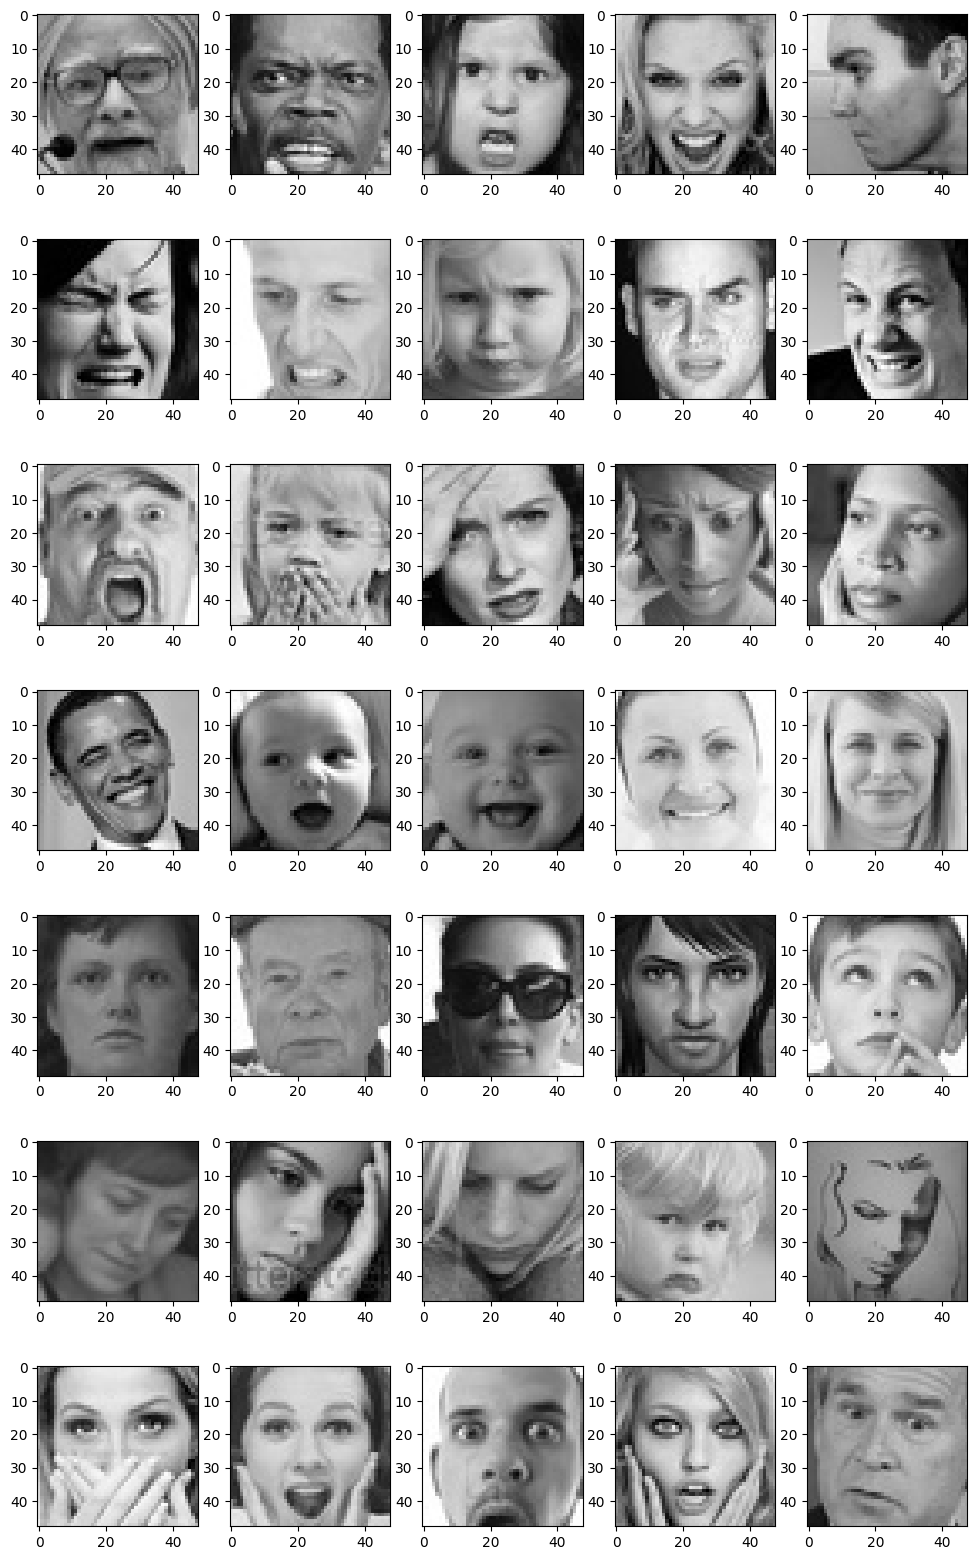

In [3]:
# imported modules
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
# image size
pic_s = 48

# input path for the images
base_p = "C:\\Users\\jalad\\Downloads\\image\\"
#  figure with appropriate size
plt.figure(0, figsize=(12,20))
cpt = 0 # Counter for the subplot
# this will iterate through each expression in the training directory
for expression in os.listdir(base_p + "images/train/"):
    for i in range(1,6):  # Displaying up to 5 images for each expression
        cpt = cpt + 1    # Increment the counter
        plt.subplot(7,5,cpt) #  Set up the subplot
        # Load and display the image
        img = load_img(base_p + "images/train/" + expression + "/" +os.listdir(base_p + "images/train/" + expression)[i], target_size=(pic_s, pic_s))
        plt.imshow(img, cmap="gray")

In [4]:
# the batch size for training
batch_size = 128
# ImageDataGenerator for training and validation data initializing
data_train = ImageDataGenerator()
data_validation = ImageDataGenerator()


# data generators for the training set 
train_v= data_train.flow_from_directory('C:\\Users\\jalad\\Downloads\\image\\images\\train', # path for the train folder
                                                    target_size=(pic_s,pic_s), # target image size
                                                    color_mode="grayscale", # Converting images to grayscale
                                                    batch_size=batch_size, # Setting batch size
                                                    class_mode='categorical', # Using categorical labels
                                                    shuffle=True) # Shuffling the data during training
# data generators for the validation set
validation_v = data_validation.flow_from_directory('C:\\Users\\jalad\\Downloads\\image\\images\\validation', # path for the train folder
                                                    target_size=(pic_s,pic_s), # target image size
                                                    color_mode="grayscale", # Converting images to grayscale
                                                    batch_size=batch_size,  # Setting batch size
                                                    class_mode='categorical', # Using categorical labels
                                                    shuffle=False) #  not shuffling the data for validation 

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [5]:


# assigning a number of classes to a variable
classes = 7

# 
model8 = Sequential()

# first Convolution layer
model8.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1))) # 64 filters, filter size is (3, 3), input shape is 48, 48, 1
model8.add(BatchNormalization()) # Batch normalization is applied to normalize the outputs of the previous layer
model8.add(Activation('relu')) # ReLU activation function
model8.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer with pool size is 2,2 
model8.add(Dropout(0.25)) #  to prevent overfitting Dropout layer 

# 2nd Convolution layer
model8.add(Conv2D(128,(5,5), padding='same')) # 128 filters and filter size (5, 5)
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

# 3rd Convolution layer
model8.add(Conv2D(512,(3,3), padding='same')) # 512 filters and filter 3,3
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

# 4th Convolution layer
model8.add(Conv2D(512,(3,3), padding='same')) # 512 filters and filter 3,3
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))

# Flattening
model8.add(Flatten()) # addition of a flattening layer to the model
# Fully connected layer 1st layer
model8.add(Dense(256)) # fully connected layer to the neural network architecture with 256 neurons
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model8.add(Dropout(0.25)) # adds a dropout layer to the neural network architecture. Dropout is a regularization technique

# Fully connected layer 2nd layer
model8.add(Dense(512))
model8.add(BatchNormalization())
model8.add(Activation('relu'))
model8.add(Dropout(0.25)) #  25% of the input units will be randomly set to zero during training

model8.add(Dense(classes, activation='softmax'))  # Output layer with softmax activation for multiclass classification

opt = Adam(learning_rate=0.0001) # a learning rate of 0.0001 Adam optimizer
model8.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # the model is compiled with categorical cross-entropy loss 

In [6]:
%%time

# number of epochs to train
epochs = 50

from keras.callbacks import ModelCheckpoint
# ModelCheckpoint object to save model weights during training
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, mode='max')
callbacks = [checkpoint] # Generating a callback list that exclusively includes the ModelCheckpoint callback
# Training model8 with the training dataset and validating its performance with the validation dataset.
#The validation_data parameter indicates the dataset used for evaluating the model's performance after each epoch during training.

# The validation_steps parameter indicates the quantity of batches to be processed from the validation dataset in every epoch.
# the callbacks parameter specifies a collection of callback functions to be utilized during training.
history = model8.fit(x=train_v,
                            steps_per_epoch=train_v.n//train_v.batch_size, # The steps_per_epoch parameter determines how many batches of data will be processed in each epoch from the training dataset.
                            epochs=epochs, # The epochs parameter defines how many times the entire training dataset will be iterated over during the training process
                            validation_data = validation_v, 
                            validation_steps = validation_v.n//validation_v.batch_size, 
                            callbacks=callbacks
                            )

Epoch 1/50


225/225 [==============================] - ETA: 0s - loss: 2.0154 - accuracy: 0.2343
Epoch 1: saving model to model_weights.h5
225/225 [==============================] - 107s 467ms/step - loss: 2.0154 - accuracy: 0.2343 - val_loss: 1.7330 - val_accuracy: 0.3048
Epoch 2/50


C:\Users\jalad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - ETA: 0s - loss: 1.8290 - accuracy: 0.2948
Epoch 2: saving model to model_weights.h5
225/225 [==============================] - 104s 463ms/step - loss: 1.8290 - accuracy: 0.2948 - val_loss: 1.6491 - val_accuracy: 0.3601
Epoch 3/50
225/225 [==============================] - ETA: 0s - loss: 1.7271 - accuracy: 0.3373
Epoch 3: saving model to model_weights.h5
225/225 [==============================] - 106s 470ms/step - loss: 1.7271 - accuracy: 0.3373 - val_loss: 1.6292 - val_accuracy: 0.3705
Epoch 4/50
225/225 [==============================] - ETA: 0s - loss: 1.6419 - accuracy: 0.3637
Epoch 4: saving model to model_weights.h5
225/225 [==============================] - 107s 475ms/step - loss: 1.6419 - accuracy: 0.3637 - val_loss: 1.6211 - val_accuracy: 0.3891
Epoch 5/50
225/225 [==============================] - ETA: 0s - loss: 1.5767 - accuracy: 0.3925
Epoch 5: saving model to model_weights.h5
225/225 [==============================] - 108s 480ms/

In [7]:
#Assess the model's performance on the validation dataset and save the outcomes in the variable named 'evaluation'
evaluation=model8.evaluate(validation_v)
#Display the validation loss retrieved from the evaluation outcomes
print("Validation Loss:", evaluation[0])
# Output the validation accuracy acquired from the evaluation outcomes.
print("Validation Accuracy:", evaluation[1])

56/56 [==============================] - 6s 112ms/step - loss: 1.0365 - accuracy: 0.6398
Validation Loss: 1.0364824533462524
Validation Accuracy: 0.6398245096206665


In [8]:
# Capture the overall accuracy from the evaluation outcomes and save it as 'overall_accuracy'
overall_accuracy = evaluation[1]
# printing overall accuracy
print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.6398245096206665


In [9]:
# Retrieve the historical training accuracy and save it into the variable named 'accuracy'
accuracy = history.history['accuracy']
# Obtain the historical validation accuracy and store it in the variable called 'val_accuracy'.
val_accuracy = history.history['val_accuracy']
# Capture the historical training loss and store it in the variable named 'loss'.
loss = history.history['loss']
# Retrieve the historical validation loss and store it in the variable named 'val_loss'
val_loss = history.history['val_loss']


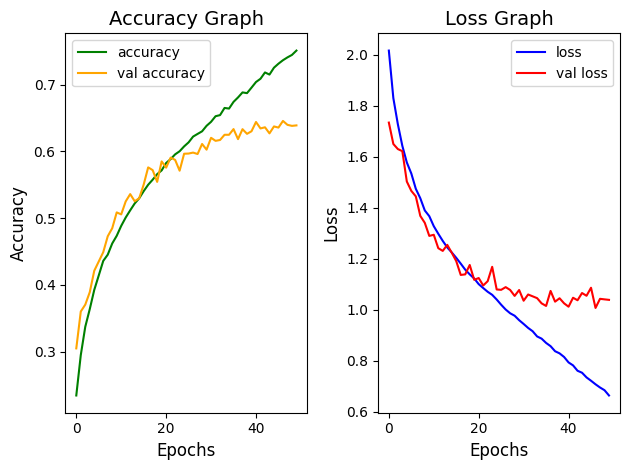

In [10]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1) #Create the first subplot in a 1x2 grid
plt.plot(accuracy, label='accuracy', color='green') # Plotting the training accuracy
plt.plot(val_accuracy, label='val accuracy', color='orange')  # Plotting the validation accuracy
plt.title('Accuracy Graph', fontsize=14)  # the title of the subplot
plt.xlabel('Epochs', fontsize=12) # label for the x-axis
plt.ylabel('Accuracy', fontsize=12) #  label for the y-axis
plt.legend(fontsize=10) # display

# Loss graph
plt.subplot(1, 2, 2) # Create the second subplot in a 1x2
plt.plot(loss, label='loss', color='blue') # training loss plotting
plt.plot(val_loss, label='val loss', color='red') # the validation loss
plt.title('Loss Graph', fontsize=14) # title
plt.xlabel('Epochs', fontsize=12) # label for the x-axis
plt.ylabel('Loss', fontsize=12) # label for the y-axis
plt.legend(fontsize=10) # display

plt.tight_layout() # subplot parameters to give specified padding
plt.show() # display

In [11]:
# Produce predictions on the validation dataset with the trained model and store the results in the variable named 'predictions'
predictions = model8.predict(validation_v)
# Retrieve the predicted class labels by choosing the class with the highest probability for each prediction.
predict = [np.argmax(probas) for probas in predictions]
# the actual class labels from the validation dataset and save them into the variable named 'test'.
test = validation_v.classes
# Get the names of the classes from the validation dataset and store them in the variable named 'class_name'.
class_name = validation_v.class_indices.keys()

56/56 [==============================] - 7s 117ms/step


<Figure size 640x480 with 0 Axes>

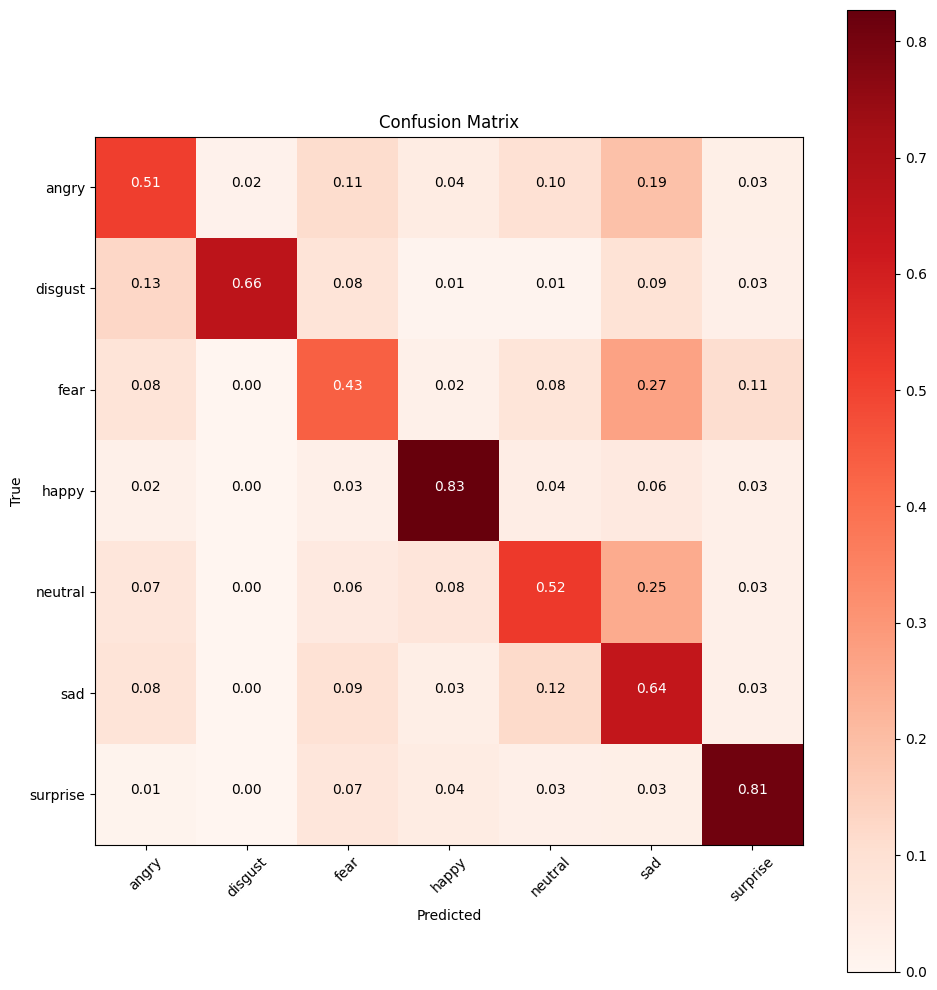

In [12]:
# Importing confusion_matrix function from scikit-learn
from sklearn.metrics import confusion_matrix
# Importing itertools for iteration
import itertools
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):  
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]   # Normalize the confusion matrix
    plt.figure(figsize=(10,10)) # figure size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # plotting the confusion matrix
    plt.title(title) # title of the plot
    plt.colorbar() # Add a color bar
    marks = np.arange(len(classes)) # Create markers for class labels
    plt.xticks(marks, classes, rotation=45) # Define the x-axis tick labels using the class names and rotate them for better readability
    plt.yticks(marks, classes) # y-axis tick marks using the class names.

    f = '.2f' # Specify the format for the text displayed in the confusion matrix
    t = cm.max() / 2. # Threshold for text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #  Iterate over confusion matrix elements
        plt.text(j, i, format(cm[i, j], f), #  text to plot with format
                 horizontalalignment="center", # Center alignment
                 color="white" if cm[i, j] > t else "black") # Adjust the color of the text in the confusion matrix based on a specified threshold
        plt.ylabel('True') # y-axis label
    plt.xlabel('Predicted') #  x-axis label

    plt.tight_layout() # Adjust layout
# confusion matrix
confusion = confusion_matrix(test, predict)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
# Designate the colormap (cmap) for the color scheme used in the confusion matrix plot
plot_confusion_matrix(confusion, classes=class_name, title='Confusion Matrix', cmap=plt.cm.Reds)  
plt.show() # Show the plot
